In [138]:
#packages

import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV


In [139]:
#importing wine quality dataset
dt = pd.read_csv(r'/kaggle/input/wine-ds/Major Project Dataset (Wine Classification).csv')
dt

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [140]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [141]:
dt[dt['total sulfur dioxide'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.5,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.8,10.5,5.0


In [142]:
dt[dt['pH'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.997,NaN,0.58,9.3,6.0


In [143]:
dt[dt['quality'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
123,8.0,0.71,0.0,2.6,0.08,11.0,34.0,0.9976,3.44,0.53,9.5,NaN


In [144]:
#handling NaN values of 'total sulfur dioxide' column
column_to_impute = 'total sulfur dioxide' 
imputer = KNNImputer(n_neighbors=5)
dt[column_to_impute] = imputer.fit_transform(dt[[column_to_impute]])


In [145]:
#handling NaN values of 'pH' column
column_to_impute = 'pH' 
imputer = KNNImputer(n_neighbors=5)
dt[column_to_impute] = imputer.fit_transform(dt[[column_to_impute]])

In [146]:
#handling NaN values of 'quality' column
column_to_impute = 'quality'  
imputer = KNNImputer(n_neighbors=5)
dt[column_to_impute] = imputer.fit_transform(dt[[column_to_impute]])

In [147]:
#removing outliers

def detect_outliers_zscore(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    return (z_scores > threshold) | (z_scores < -threshold)

outlier_indices = detect_outliers_zscore(dt.drop(columns=['quality']))
data_no_outliers = dt[~outlier_indices.any(axis=1)]

print("Number of Outliers Detected:", outlier_indices.sum().sum())

Number of Outliers Detected: 231


In [148]:
data_no_outliers.to_csv("wine_quality_dataset_preprocessed.csv", index=False)

In [149]:
#new preprocessed dataset
dtp = pd.read_csv(r'/kaggle/working/wine_quality_dataset_preprocessed.csv')
dtp

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
2,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
3,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
4,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1420,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1421,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1422,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1423,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [150]:
dtp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1425 non-null   float64
 1   volatile acidity      1425 non-null   float64
 2   citric acid           1425 non-null   float64
 3   residual sugar        1425 non-null   float64
 4   chlorides             1425 non-null   float64
 5   free sulfur dioxide   1425 non-null   float64
 6   total sulfur dioxide  1425 non-null   float64
 7   density               1425 non-null   float64
 8   pH                    1425 non-null   float64
 9   sulphates             1425 non-null   float64
 10  alcohol               1425 non-null   float64
 11  quality               1425 non-null   float64
dtypes: float64(12)
memory usage: 133.7 KB


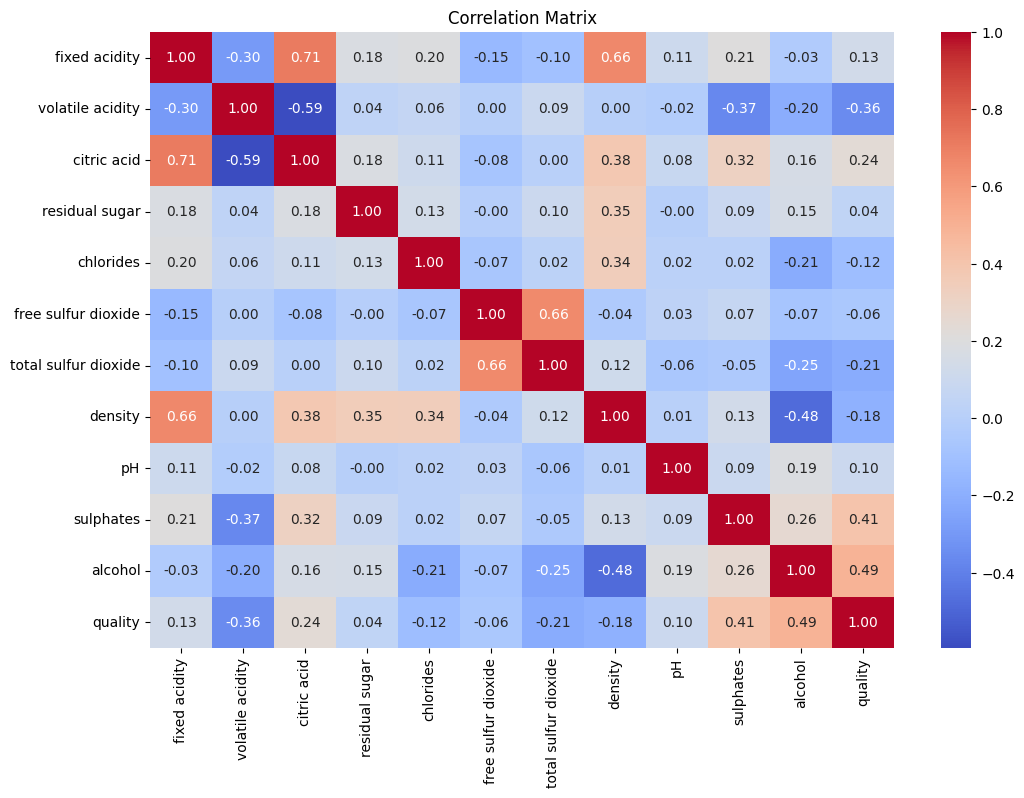

In [151]:
#finding correlation among various attributes
correlation_matrix = dtp.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [152]:
X = dtp.drop(columns=['quality'])
y = dtp['quality']
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
feature_importance = model.feature_importances_

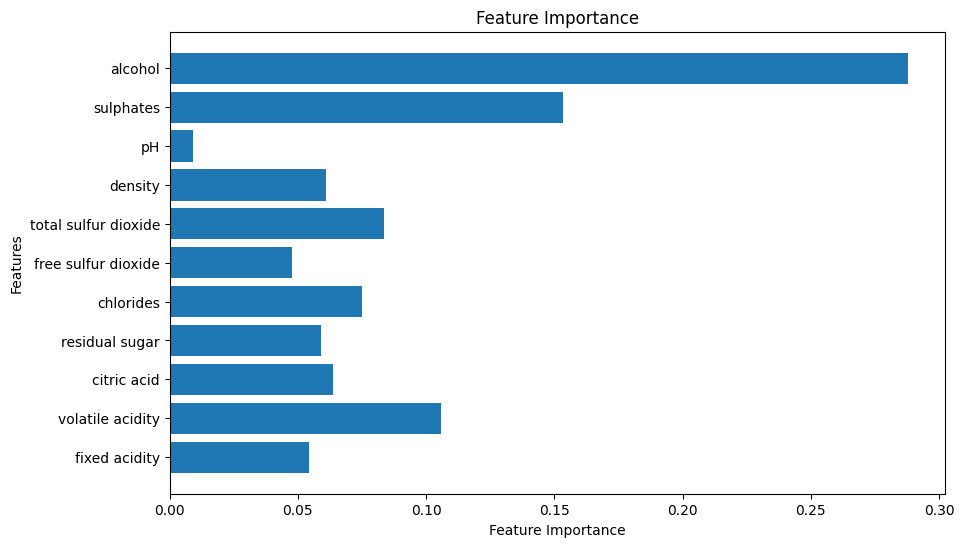

In [153]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [154]:
#input and output features
X = dtp.drop(columns=['quality'])
y = dtp['quality']

In [155]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{model_name}:")
    print("Mean RMSE:", rmse_scores.mean())
    print("Standard Deviation of RMSE:", rmse_scores.std())
    print()

Linear Regression:
Mean RMSE: 0.643344469202874
Standard Deviation of RMSE: 0.010638572050441386

Decision Tree:
Mean RMSE: 0.8945082024755628
Standard Deviation of RMSE: 0.03927870691040502

Random Forest:
Mean RMSE: 0.6494362083357865
Standard Deviation of RMSE: 0.012252425539910683

XGBoost:
Mean RMSE: 0.7063524304703492
Standard Deviation of RMSE: 0.02033932170933129



In [156]:
#training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 0.3849038275446519
Mean Absolute Error (MAE): 0.43717385767296835
R-squared: 0.41580436893051886


In [157]:
final_model = RandomForestRegressor(random_state=42)
final_model.fit(X, y)


RandomForestRegressor(random_state=42)

In [158]:
import joblib
joblib.dump(final_model, "wine_quality_model.pkl")

['wine_quality_model.pkl']

In [159]:
loaded_model = joblib.load("wine_quality_model.pkl")

In [160]:
#sample testing the model

samp = pd.DataFrame({
    'fixed acidity': [7.2, 6.5, 8.1],
    'volatile acidity': [0.23, 0.35, 0.724],
    'citric acid': [0.32, 0.27, 0.05],
    'residual sugar': [8.5, 6.3, 2.0],
    'chlorides': [0.058, 0.046, 0.081],
    'free sulfur dioxide': [45, 30, 12.7],
    'total sulfur dioxide': [170, 75, 30],
    'density': [0.9941, 0.9908, 0.9902],
    'pH': [3.00, 3.20, 3.50],
    'sulphates': [0.44, 0.55, 0.45],
    'alcohol': [10.8, 11.4, 10.6]
})

predicts = loaded_model.predict(samp)
print("\nSample Predictions:")
for i, pred in enumerate(predicts):
    print(f"Sample {i+1}: Predicted Quality - {pred:.0f}")



Sample Predictions:
Sample 1: Predicted Quality - 6
Sample 2: Predicted Quality - 6
Sample 3: Predicted Quality - 5
